## Data Visualization: General Public
***

### Datasets:
#### TIF District Programming - 2017-2021 (tif.csv)
- **Source:** City of Chicago via the [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/TIF-District-Programming-2017-2021/ycd5-punx/about_data)
- **Description:** Provided by the City of Chicago Office of Budget and Management, this dataset compiles financial data from Tax Increment Financing (TIF) districts, covering the years 2017 through their planned expiration. It includes estimated fund balances, project expenditures, and revenue projections based on property values within each TIF district. TIF districts are designated areas where property tax revenues are earmarked for specific development projects, aimed at revitalizing underdeveloped areas and stimulating economic growth.
-**Licensing and Attribution:**
    - Terms of Use: “This site provides applications using data that has been modified for use from its original source, www.cityofchicago.org, the official website of the City of Chicago.  The City of Chicago makes no claims as to the content, accuracy, timeliness, or completeness of any of the data provided at this site.  The data provided at this site is subject to change at any time.  It is understood that the data provided at this site is being used at one’s own risk.”

-**File Size:** 732 KB
-**Data Characteristics:**
    - 8 Columns, 6,663 Rows
    - Field Names: TIF ID, TIF Name, Time Period, Type, Description, Amount, Designation Date, Expiration Date

#### TIF Boundaries (tif_boundaries.geojson)
- **Source:** City of Chicago via the [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/TIF-Boundaries/ku9w-h8e9)
- **Description:** Created by Thomas Applegate, this data source contains information Tax Increment Financing (TIF) district boundaries in Chicago. The data can be viewed on the Chicago Data Portal with a web browser. However, to view or use the files outside of a web browser, you will need to use compression software and special GIS software, such as ESRI ArcGIS (shapefile) or Google Earth (KML or KMZ), is required.
-**Licensing and Attribution:**
    - Terms of Use: Same terms of use as the TIF District Programming Dataset.

-**File Size:** 3.8 MB
-**Data Characteristics:**
    - 21 Columns, 121 Rows
    - Field Names: sbif, name, shape_area, show, objectid_1, name_trim, wards_2023, ref, approval_d, objectid, fid_1, shape_leng, comm_area, objectid_2, use, repealed_d, type, shape_le_1, ind, expiration, geometry


In [41]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import random

In [42]:
gdf = gpd.read_file('data/tif_boundaries.geojson')

In [43]:
gdf = gdf[gdf['type']=='Existing']

In [44]:
def random_color():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return "#{:02x}{:02x}{:02x}".format(r, g, b)

In [45]:
# Chart 1: This is the code to generate an interactive Folium/Leaflet Map of the TIF boundaries in Chicago. 
# In addition, it allows the User to see the Name of the TIF District and it's use purpose.
# Since this is rendered using folium, I have included a screenshot below so that it may render on github.


tif_map = folium.Map(location=[gdf.centroid.y.mean(), gdf.centroid.x.mean()], zoom_start=10, tiles='CartoDB Positron')

folium.GeoJson(
    gdf,
    style_function=lambda feature: {
        'fillColor': random_color(),
        'color': 'black',
        'weight': 0,
        'dashArray': '5, 5',
        'fillOpacity': 0.5,
    },
    tooltip=folium.features.GeoJsonTooltip(fields=['name','use'], labels=True)
).add_to(tif_map)

tif_map

/var/folders/zv/n7l2w09n51l8qszs6rj9vnp00000gn/T/ipykernel_33580/530171095.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tif_map = folium.Map(location=[gdf.centroid.y.mean(), gdf.centroid.x.mean()], zoom_start=10, tiles='CartoDB Positron')


![img](diagrams/TIF_Folium_Map.png)


In [46]:
df = pd.read_csv('data/tif.csv')
df['Designation Date'] = pd.to_datetime(df['Designation Date'], format='%m/%d/%Y')
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], format='%m/%d/%Y')
df.rename(columns={'TIF Number': 'ref'}, inplace=True)

In [47]:
df.columns

Index(['ref', 'TIF Name', 'Time Period', 'Type', 'Description', 'Amount',
       'Designation Date', 'Expiration Date'],
      dtype='object')

In [48]:
df.head(2)

ref            TIF Name Time Period                 Type  \
0  T-177   Foster/California        2017  Current Obligations   
1  T-173  Montrose/Clarendon        2017  Current Obligations   

              Description  Amount Designation Date Expiration Date  
0  Program administration    -500       2014-03-05      2038-12-31  
1  Program administration   -6400       2010-06-30      2034-12-31

In [49]:
df['Designation Year'] = pd.to_datetime(df['Designation Date']).dt.year
df['Expiration Year'] = pd.to_datetime(df['Expiration Date']).dt.year

In [50]:
# after 2000 dataframe created
df = df[df['Designation Year'] > 2000]
df['Designation Year'].value_counts()

Designation Year
2002    812
2001    506
2007    457
2006    398
2004    217
2009    196
2010    171
2014    161
2008    135
2016    110
2005     87
2003     77
2012     59
2011      8
Name: count, dtype: int64

In [51]:
# group function to create a dataframe that focuses on the TIF Reference (TIF ID) and the identifies the life spans
grouped_df = df.groupby(['ref', 'TIF Name']).agg({'Designation Year': 'min', 'Expiration Year': 'max'}).reset_index()

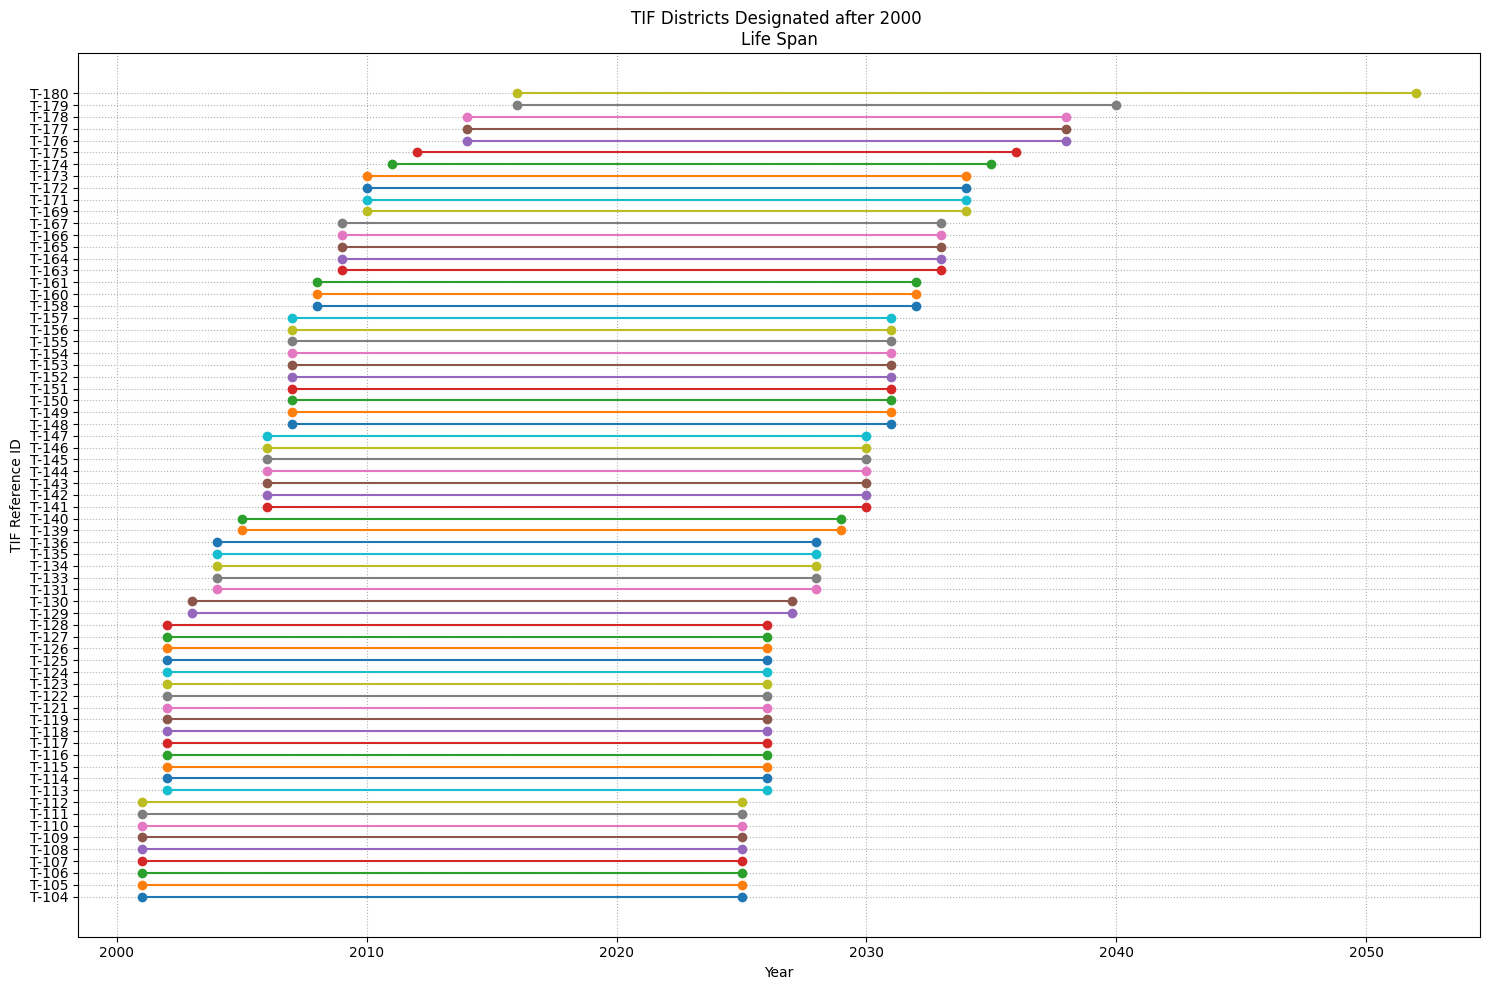

In [52]:
# Chart 2: TIF LIFE SPAN -- Looking at those designated after 2000 and seeing how long they will accumulate funds.
plt.figure(figsize=(15, 10))
for i, row in grouped_df.iterrows():
    plt.plot([row['Designation Year'], row['Expiration Year']], [i, i], marker='o', label=row['TIF Name'])

plt.xlabel('Year')
plt.ylabel('TIF Reference ID')
plt.title('TIF Districts Designated after 2000 \nLife Span')
plt.yticks(range(len(grouped_df)), grouped_df['ref'])
plt.grid(True,linestyle=':')
plt.tight_layout()
plt.show()

In [53]:
grouped_df.head(3)

ref                TIF Name  Designation Year  Expiration Year
0  T-104              River West              2001             2025
1  T-105             53rd Street              2001             2025
2  T-106  Englewood Neighborhood              2001             2025